https://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset

# Contexto

# Características del Dataset AI4I 2020

El dataset contiene **10,000 registros** (filas) con **14 características** (columnas). A continuación, se describen las características principales:

### 1. **UID**
- **Descripción**: Identificador único para cada registro.
- **Rango**: 1 a 10,000.

### 2. **product ID**
- **Descripción**: Identificador del producto, compuesto por:
  - Una letra que indica la calidad del producto:
    - **L**: Calidad baja (50% de los productos).
    - **M**: Calidad media (30%).
    - **H**: Calidad alta (20%).
  - Un número de serie específico de cada variante.

### 3. **air temperature [K]**
- **Descripción**: Temperatura del aire en Kelvin.
- **Generación**: Proceso de caminata aleatoria, normalizado con:
  - Desviación estándar (σ): 2 K.
  - Media: 300 K.

### 4. **process temperature [K]**
- **Descripción**: Temperatura del proceso en Kelvin.
- **Generación**: Calculada como:
  - Temperatura del aire + 10 K.
  - Normalizada con una desviación estándar de 1 K.

### 5. **rotational speed [rpm]**
- **Descripción**: Velocidad de rotación en revoluciones por minuto (rpm).
- **Cálculo**:
  - Basada en una potencia de **2860 W**.
  - Se añade ruido normalmente distribuido.

### 6. **torque [Nm]**
- **Descripción**: Torque en Newton-metro (Nm).
- **Distribución**:
  - Media: 40 Nm.
  - Desviación estándar (σ): 10 Nm.
  - **Nota**: Los valores negativos no son permitidos.

### 7. **tool wear [min]**
- **Descripción**: Desgaste de la herramienta en minutos.
- **Ajustes por calidad del producto**:
  - **H (alta calidad)**: +5 minutos.
  - **M (media calidad)**: +3 minutos.
  - **L (baja calidad)**: +2 minutos.

### 8. **machine failure**
- **Descripción**: Etiqueta binaria que indica si la máquina falló:
  - **0**: No hubo fallo.
  - **1**: Ocurrió al menos un fallo.
- **Basado en**: Cinco modos de falla posibles (TWF, HDF, PWF, OSF, RNF).

### 9-13. **Modos de Falla (Etiquetas Derivadas)**
- **TWF**: Fallo por desgaste de la herramienta.
- **HDF**: Fallo por disipación de calor.
- **PWF**: Fallo por potencia.
- **OSF**: Fallo por sobrecarga.
- **RNF**: Fallo aleatorio.

### 14. **Clase derivada**
- **Descripción**: Etiqueta que resume los fallos mencionados y los clasifica como `machine failure` cuando al menos uno de los modos ocurre.

---

Este dataset ofrece características adecuadas para entrenar modelos de predicción, con un enfoque en la identificación y prevención de fallos en sistemas industriales. ¿Te gustaría explorar algo más en detalle?


## Modos de Falla en el Dataset AI4I 2020

El dataset incluye la etiqueta **`machine failure`**, que indica si la máquina falló debido a uno o más de los siguientes modos de falla:

### 1. **Fallo por desgaste de la herramienta (TWF)**
- La herramienta se desgasta y puede fallar aleatoriamente entre los **200 y 240 minutos** de uso.
- Estadísticas del dataset:
  - **69 reemplazos**.
  - **51 fallos**.

---

### 2. **Fallo por disipación de calor (HDF)**
- Ocurre si se cumplen las dos condiciones:
  1. La diferencia entre la temperatura del aire y la temperatura del proceso es menor a **8.6 K**.
  2. La velocidad de rotación es menor a **1380 rpm**.
- En el dataset, este tipo de fallo ocurre en **115 puntos de datos**.

---

### 3. **Fallo por potencia (PWF)**
- La potencia requerida para el proceso se calcula como el producto del **torque** y la **velocidad de rotación** (en rad/s).
- El fallo ocurre si la potencia:
  - Es menor a **3500 W**.
  - Es mayor a **9000 W**.
- Este fallo aparece **95 veces** en el dataset.

---

### 4. **Fallo por sobrecarga (OSF)**
- Ocurre si el producto del **desgaste de la herramienta** y el **torque** excede los límites establecidos según la calidad del producto:
  - **L**: 11,000 min·Nm.
  - **M**: 12,000 min·Nm.
  - **H**: 13,000 min·Nm.
- Este tipo de fallo ocurre en **98 puntos de datos**.

---

### 5. **Fallos aleatorios (RNF)**
- Cada proceso tiene una probabilidad de **0.1%** de fallar, independientemente de los parámetros del sistema.
- Este tipo de fallo ocurre **5 veces** en el dataset.

---

### Etiqueta de Falla
- Si **al menos uno** de estos modos de falla ocurre, la etiqueta **`machine failure`** se establece en **1**.
- Nota: El modelo de aprendizaje automático no puede identificar cuál de los modos de falla específicos causó el fallo, solo detecta si hubo un fallo.

---

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np

In [114]:
df=pd.read_csv("ai4i2020.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [116]:
print(df.describe()) 

               UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.800000         0.000000   

In [117]:
missing_values = df.isnull().sum()
print(missing_values)

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


In [118]:
print(df['Product ID'].value_counts())

M14860    1
L53850    1
L53843    1
L53844    1
L53845    1
         ..
M18193    1
M18194    1
L50515    1
L50516    1
M24859    1
Name: Product ID, Length: 10000, dtype: int64


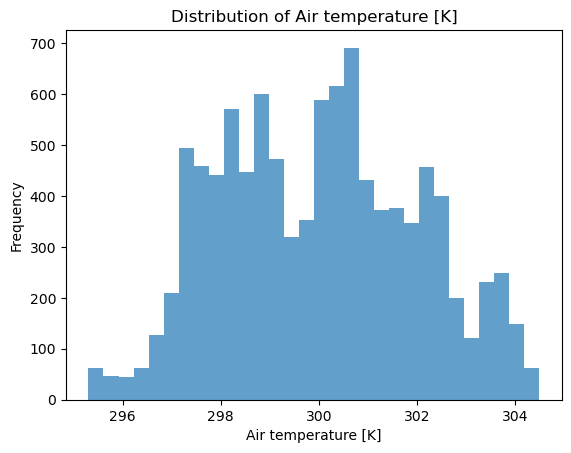

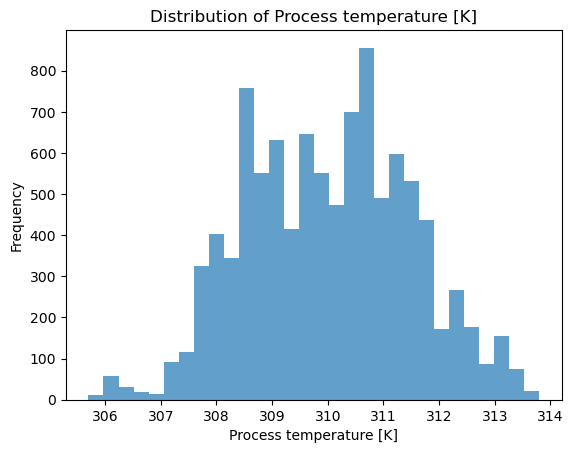

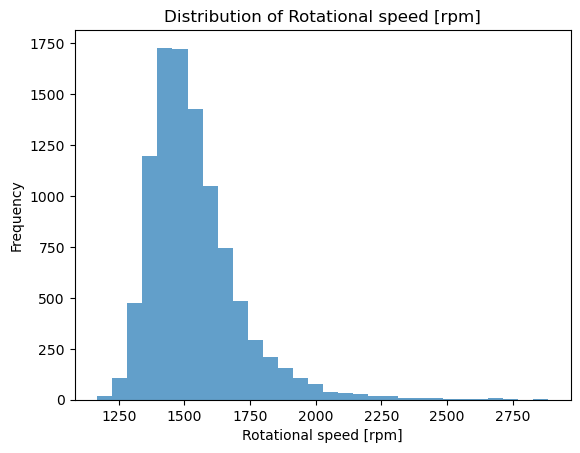

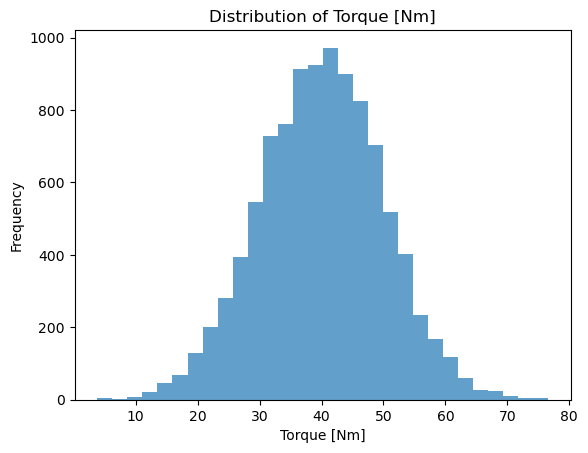

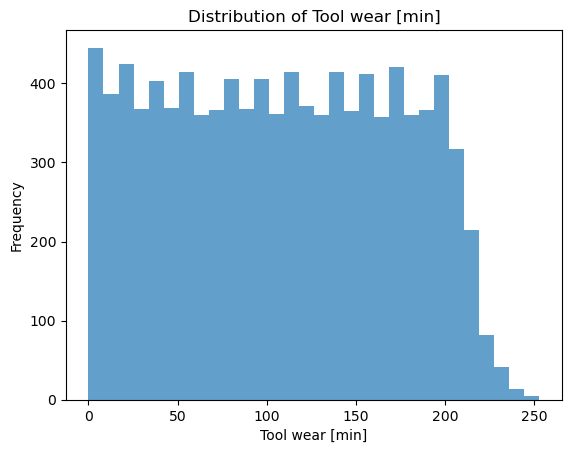

In [119]:
numerical_columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

for col in numerical_columns:
    plt.hist(df[col], bins=30, alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

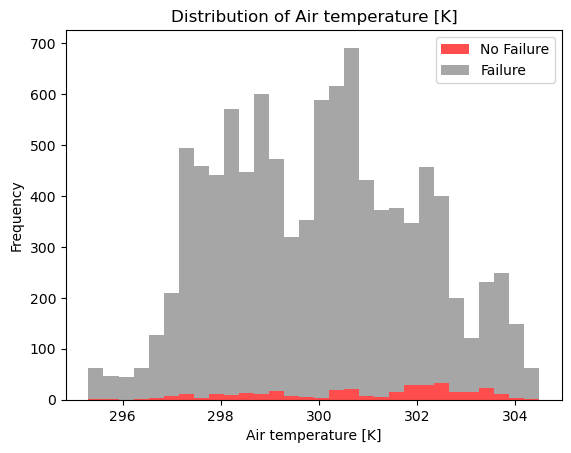

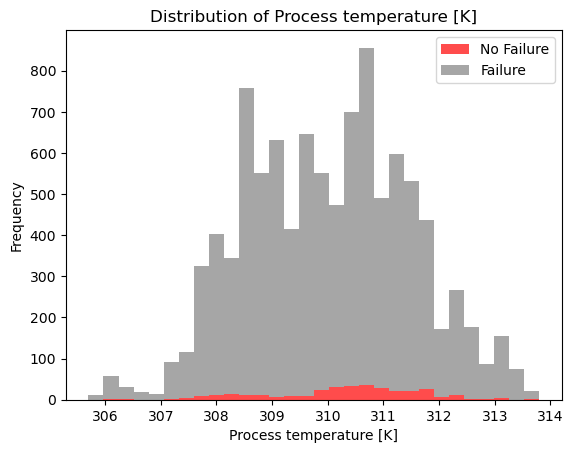

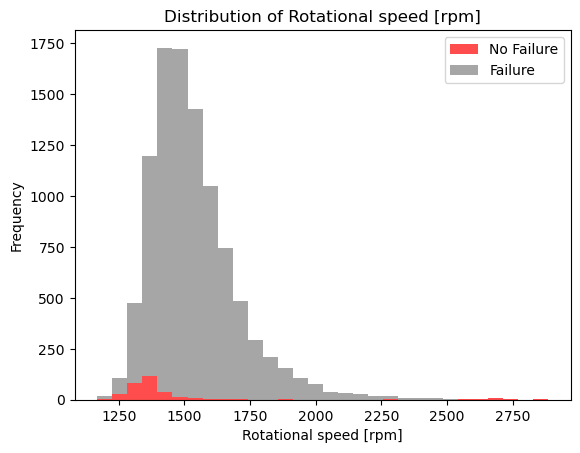

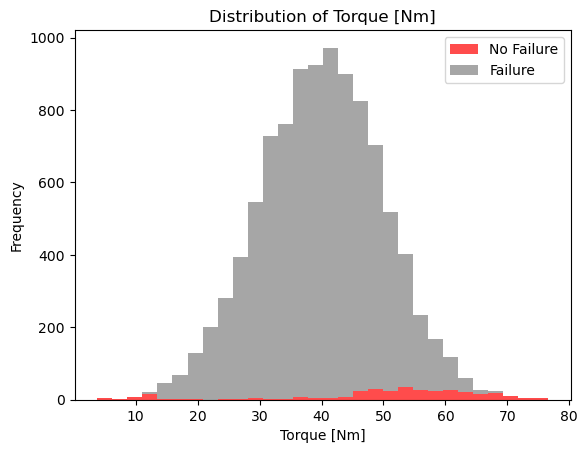

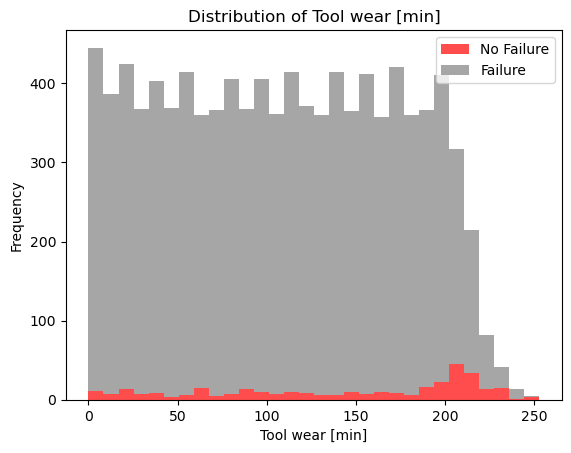

In [120]:
numerical_columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

for col in numerical_columns:
    plt.hist([df[df['Machine failure'] == 1][col],df[df['Machine failure'] == 0][col]], bins=30, stacked=True, color=['red', 'gray'], alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    #plt.ylim(0, 500)  # Ajusta este valor según sea necesario para cortar el eje y
    plt.legend(['No Failure', 'Failure'])
    plt.show()

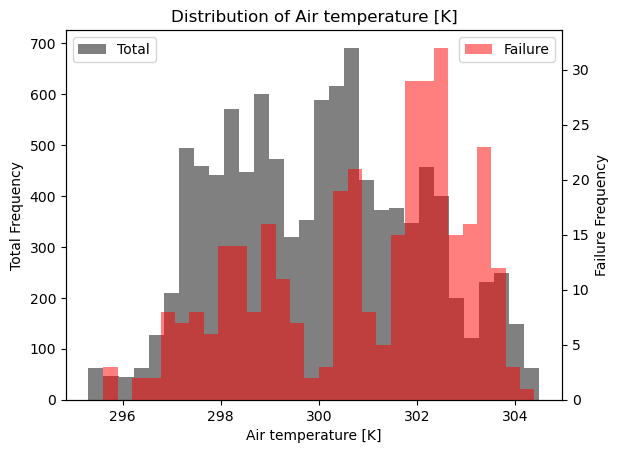

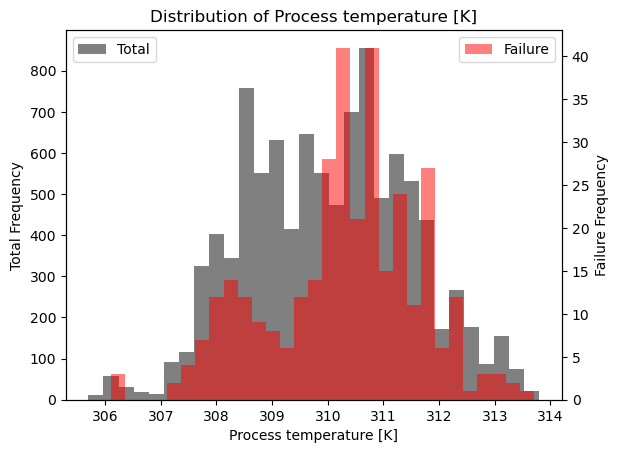

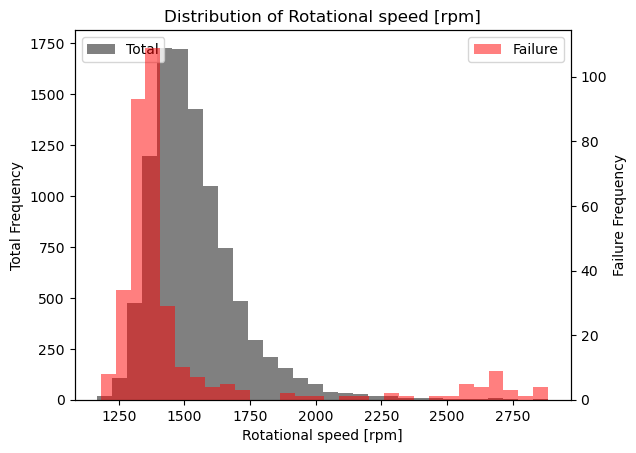

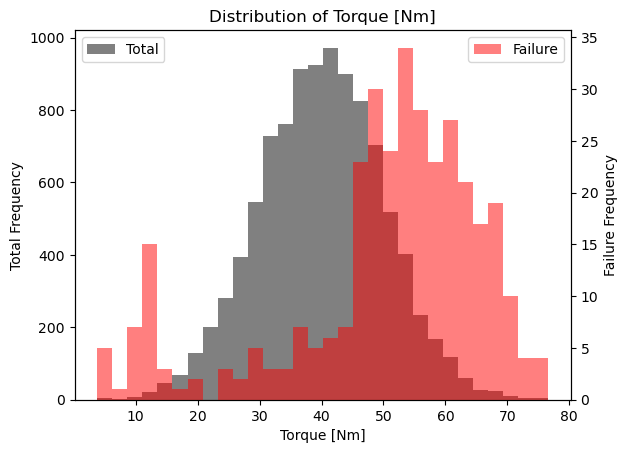

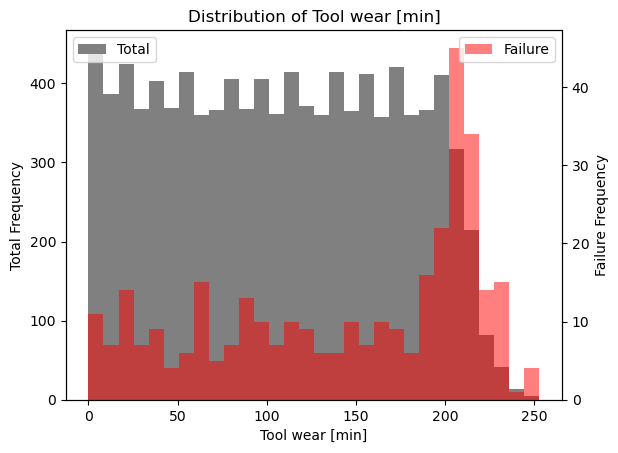

In [121]:
numerical_columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

for col in numerical_columns:
    fig, ax1 = plt.subplots()

    # Plot total (failure and no failure) on the left y-axis
    ax1.hist(df[col], bins=30, alpha=1, color='gray', label='Total')
    ax1.set_xlabel(col)
    ax1.set_ylabel('Total Frequency')
    ax1.legend(loc='upper left')

    # Create a second y-axis for the failure data
    ax2 = ax1.twinx()
    ax2.hist(df[df['Machine failure'] == 1][col], bins=30, alpha=0.5, color='red', label='Failure')
    ax2.set_ylabel('Failure Frequency')
    ax2.legend(loc='upper right')

    plt.title(f'Distribution of {col}')
    plt.show()

In [122]:
print(df.corr()['Machine failure'].sort_values(ascending=False))

Machine failure            1.000000
HDF                        0.575800
OSF                        0.531083
PWF                        0.522812
TWF                        0.362904
Torque [Nm]                0.191321
Tool wear [min]            0.105448
Air temperature [K]        0.082556
Process temperature [K]    0.035946
RNF                        0.004516
UDI                       -0.022892
Rotational speed [rpm]    -0.044188
Name: Machine failure, dtype: float64


C:\Users\edwin\AppData\Local\Temp\ipykernel_49952\3730736871.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [123]:
fig = px.scatter_3d(df, x='Torque [Nm]', y='Tool wear [min]', z='Air temperature [K]', 
                    color='Machine failure', title='3D Scatter Plot of Torque, Tool Wear, and Air Temperature')
fig.show()

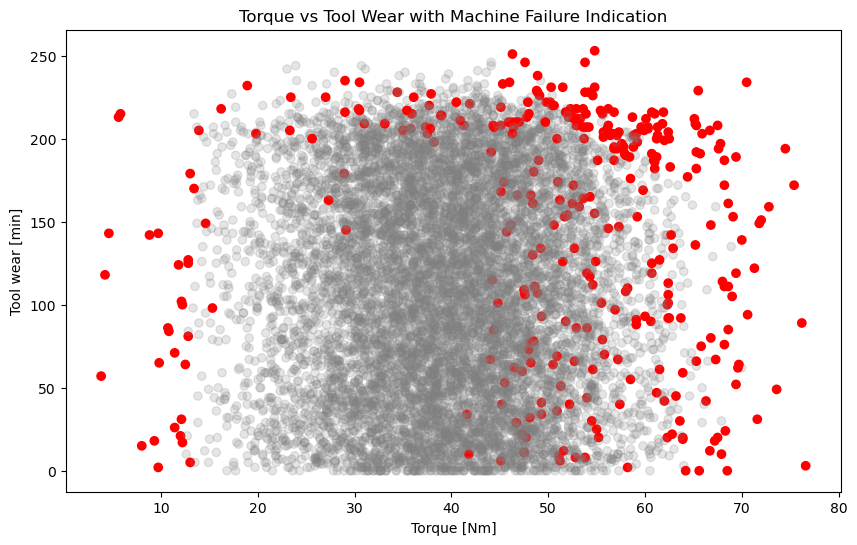

In [124]:
colors = df['Machine failure'].map({0: 'gray', 1: 'red'})
opacity = df['Machine failure'].map({0: 0.2, 1: 1.0})

plt.figure(figsize=(10, 6))
plt.scatter(df['Torque [Nm]'], df['Tool wear [min]'], c=colors, alpha=opacity)
plt.xlabel('Torque [Nm]')
plt.ylabel('Tool wear [min]')
plt.title('Torque vs Tool Wear with Machine Failure Indication')
plt.show()

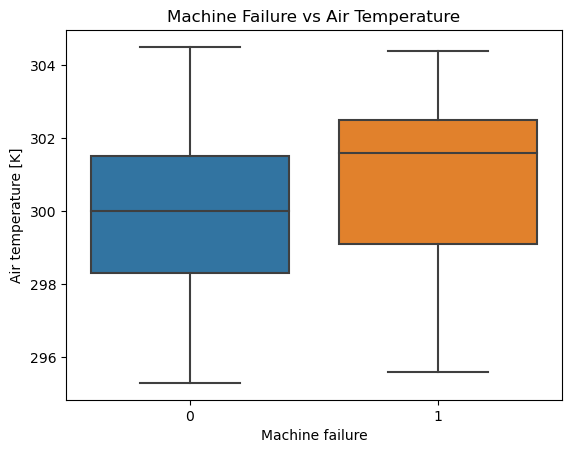

In [125]:

sns.boxplot(x='Machine failure', y='Air temperature [K]', data=df)
plt.title('Machine Failure vs Air Temperature')
plt.show()

C:\Users\edwin\AppData\Local\Temp\ipykernel_49952\3947077426.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



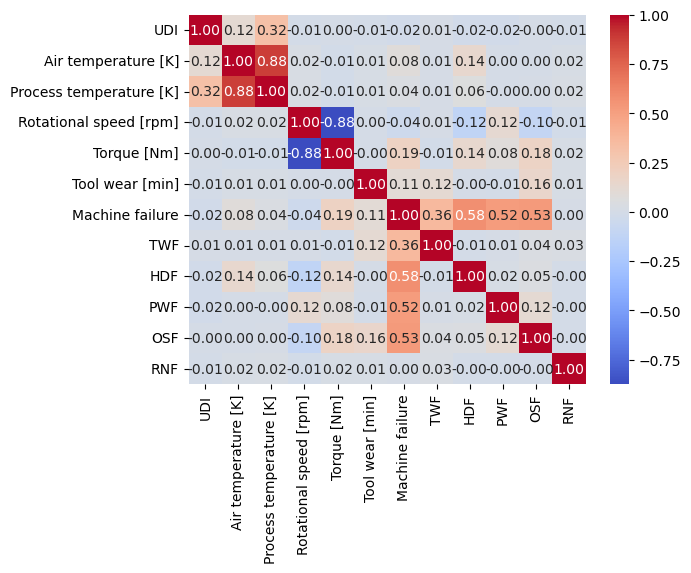

In [126]:
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()


Continuar con el EDA, haz el EDA por tipo de falla y seleccionar las graficas mas importantes.

In [146]:
pivot_table = df.pivot_table(index='Type', values=['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], aggfunc='sum', margins=True, margins_name='Total')
pivot_table = pivot_table.assign(Total=pivot_table.sum(axis=1))
print(pivot_table)

       HDF  OSF  PWF  RNF  TWF  Total
Type                                 
H        8    2    5    4    7     26
L       76   87   59   13   25    260
M       31    9   31    2   14     87
Total  115   98   95   19   46    373


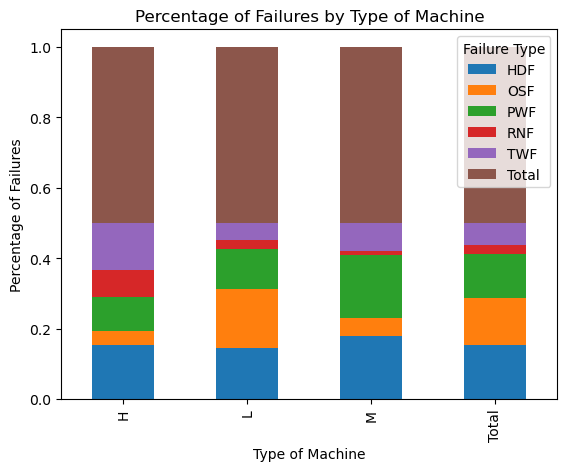

In [148]:
pivot_table.div(pivot_table.sum(axis=1), axis=0).plot(kind='bar', stacked=True)
plt.title('Percentage of Failures by Type of Machine')
plt.xlabel('Type of Machine')
plt.ylabel('Percentage of Failures')
plt.legend(title='Failure Type')
plt.show()